# Library's

In [1]:
#Numpy for dataprocessing
import numpy as np

#pandas for reading dataset and cleaning dataset 
import pandas as pd

#seaborn for ploting... graph
import seaborn as sbn

#matplotLib for ploting
import matplotlib.pyplot as plt

#os for besic operation ( Not Used if require )
import os

#Skelarn for Model Creation  and Label Encoding 
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

from sklearn.linear_model import LogisticRegression


#Use train test split to divide dataset into 2 part 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 


#confusion metrix
from sklearn.metrics import confusion_matrix

#score f1 
from sklearn.metrics import f1_score


#using svm
from sklearn.svm import SVC


#to chenage the imbalance between dataset 
# from imblearn.over_sampling import  SMOTE

from sklearn.preprocessing import StandardScaler


from sklearn.metrics import precision_score, recall_score, f1_score


# Basic Info about dataset 

In [2]:
#Reading Csv File
dataset = pd.read_csv("diabetes.csv")

In [3]:
#top 5 row

""" Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1) """


dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning using Pandas

In [4]:
#Dataset Information 

"""column labels, column data types, memory usage,
range index, and the number of
cells in each column (non-null values)
"""
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Total missing value in each colum
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Row With Null Value 
missing = dataset.isna().any(axis=1)
dataset[missing]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [7]:
#remove Na or null Value 
dataset = dataset.dropna()


In [8]:
#After Removing  Number of Null Valued Row
missing = dataset.isna().any(axis=1)
dataset[missing]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [9]:
#top 6 row in dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#Some Statistical mesurement mean standard div min max 
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#top 6 Row of dataset 
dataset.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [12]:
#Check Bottom 6 row
dataset.tail(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [13]:
#To encode the catogorical to nummeric value Not requied for this dataset becouse OutComes and outcome both are same only we can use outcome 
# le = LabelEncoder()
# dataset["OutComes"]=le.fit_transform(dataset["OutComes"])

# Exploratory data analysis

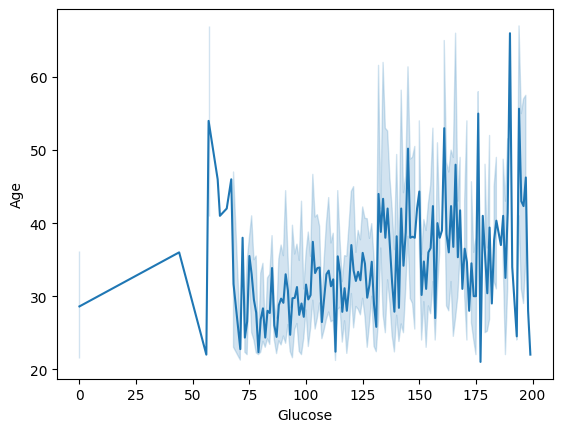

In [14]:
#check relation between Glucose and age
sbn.lineplot(data=dataset,x="Glucose",y="Age")
# plt.legend()
plt.show()

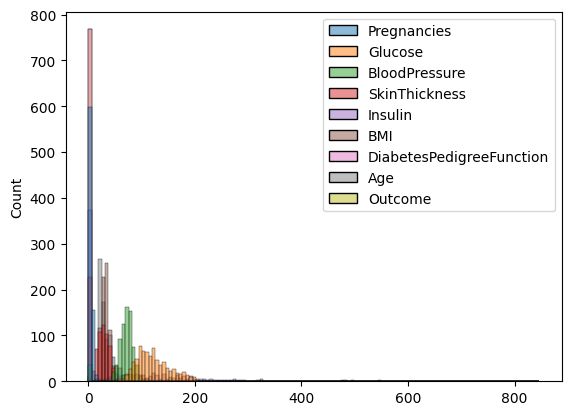

In [15]:
#hist plot for all colums in dataset
sbn.histplot(data=dataset)
plt.show()

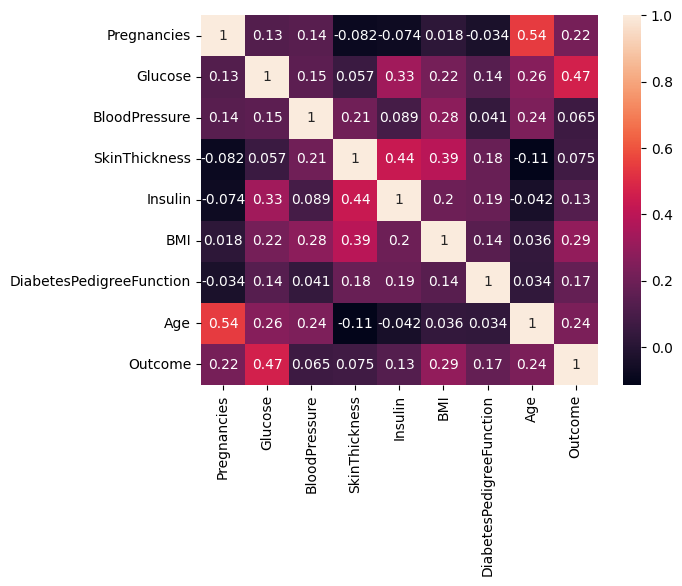

In [16]:
#graphical representation of the distribution of a dataset
sbn.heatmap(dataset.corr(),annot=True)
plt.show()

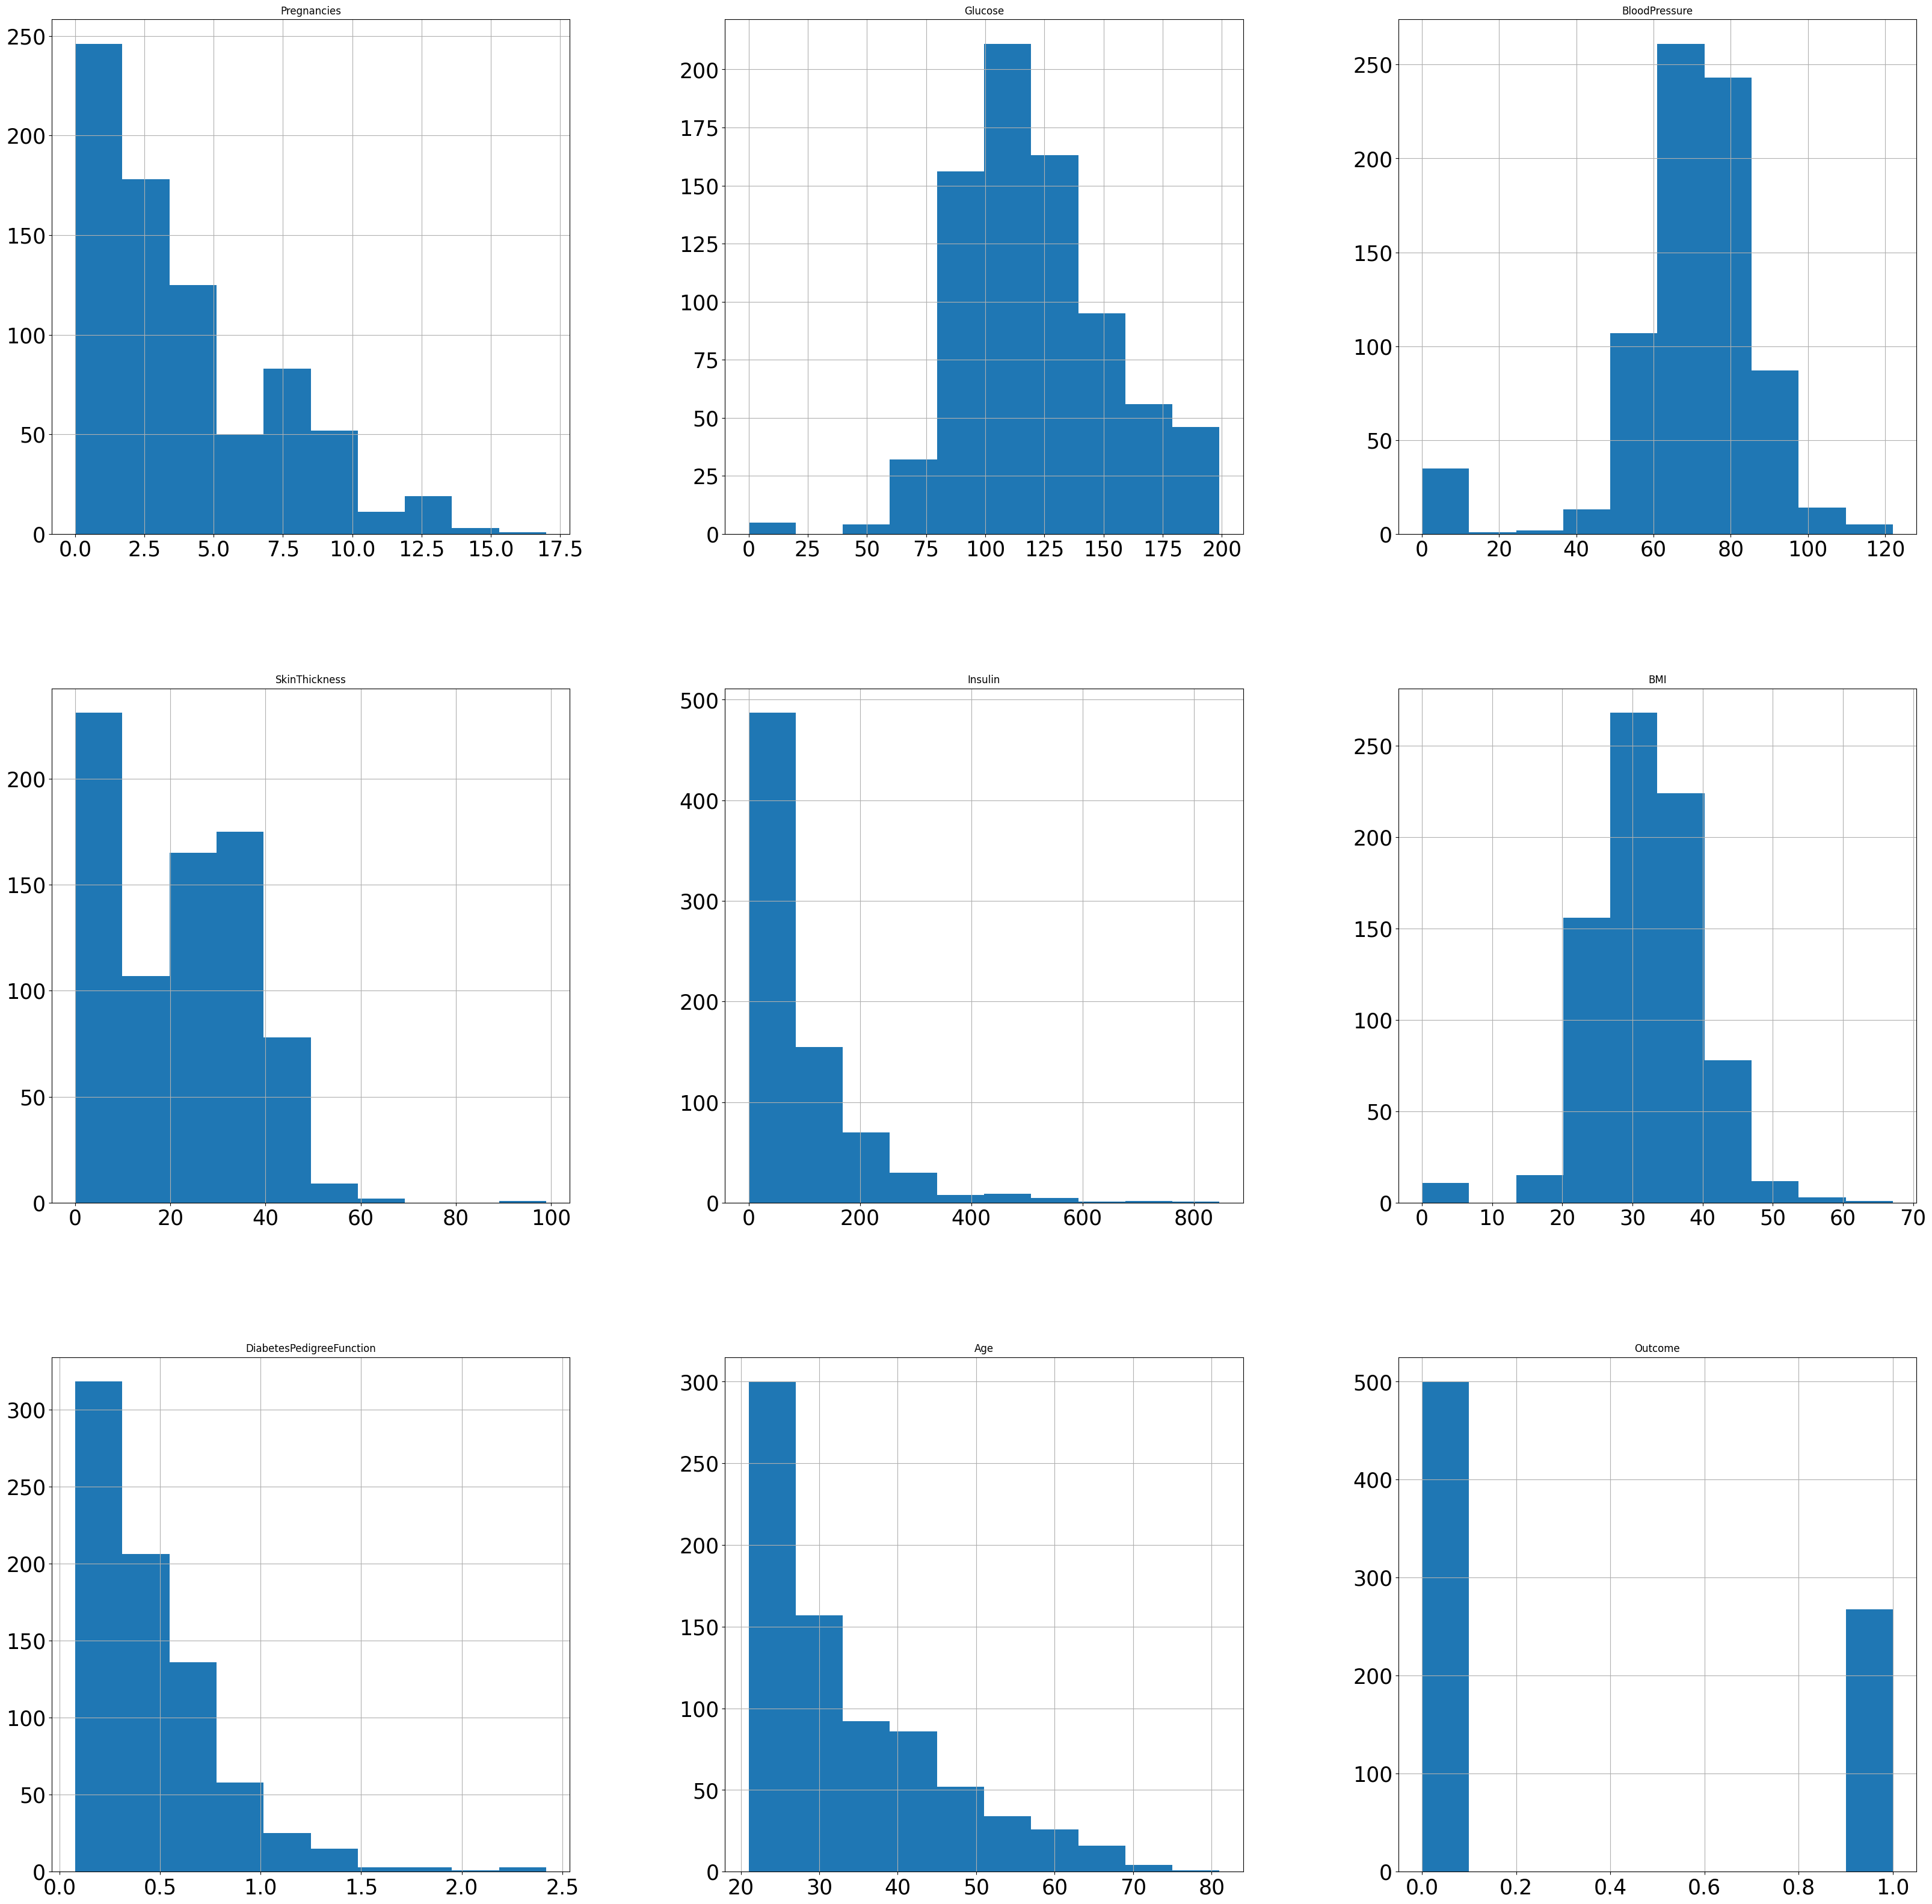

In [17]:
#check frequency distribution of dataset colums
dataset.hist(figsize=(40,40),xlabelsize=25,ylabelsize=25)
plt.show()

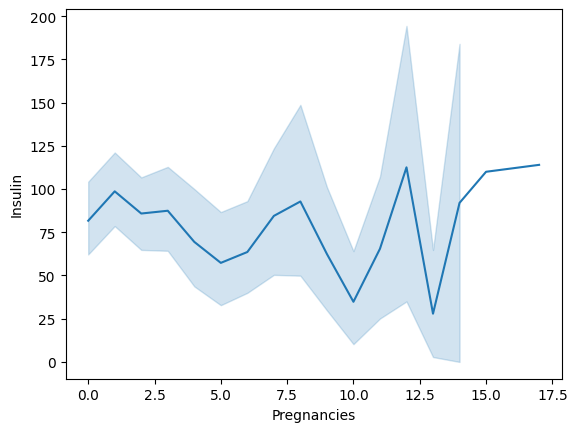

In [18]:
#check relation between Pregnancies and Insulin
sbn.lineplot(data=dataset,x="Pregnancies",y="Insulin")
# plt.legend()
plt.show()

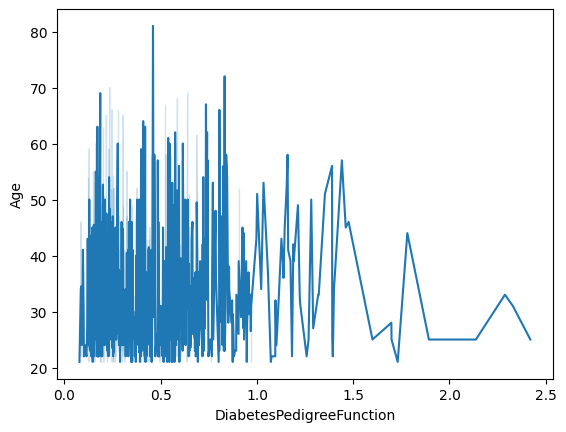

In [19]:
#check relation between DiabetesPedigreeFunction and Age
sbn.lineplot(data=dataset,x="DiabetesPedigreeFunction",y="Age")
# plt.legend()
plt.show()

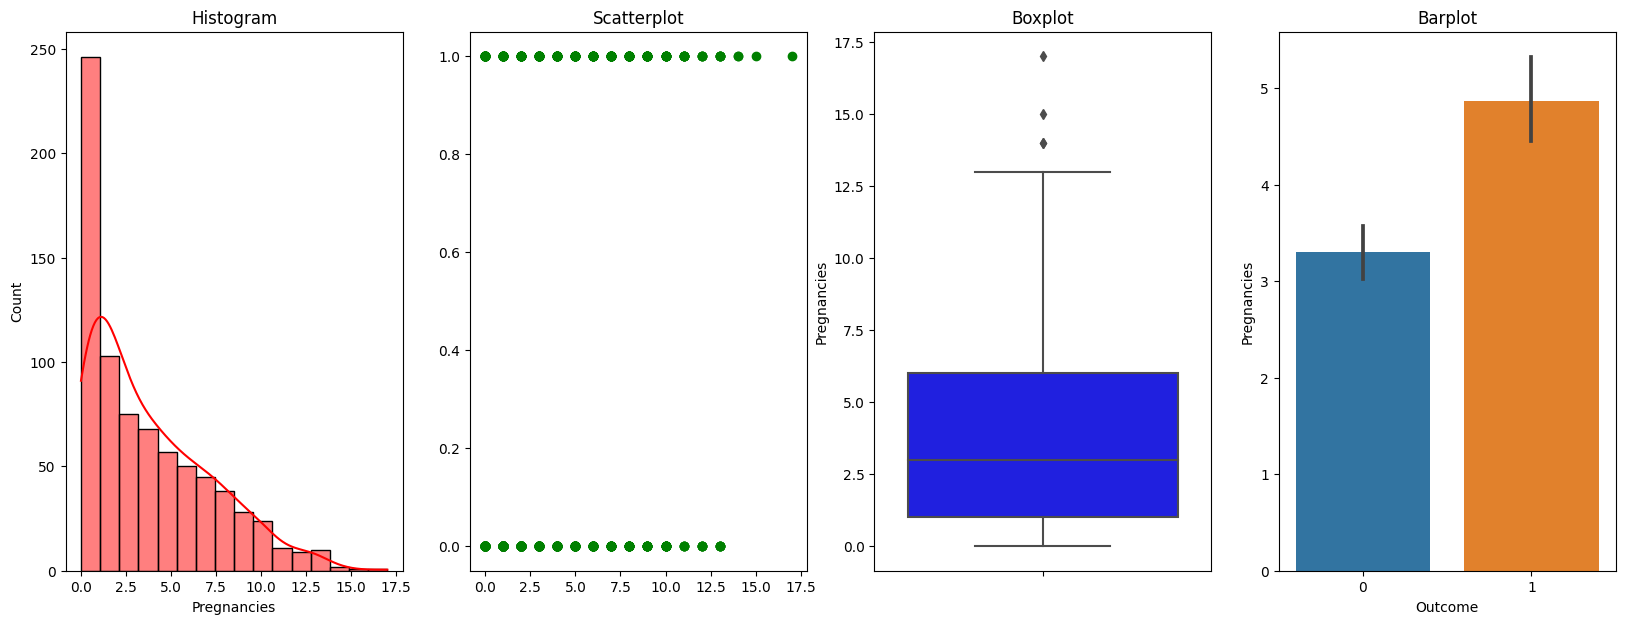

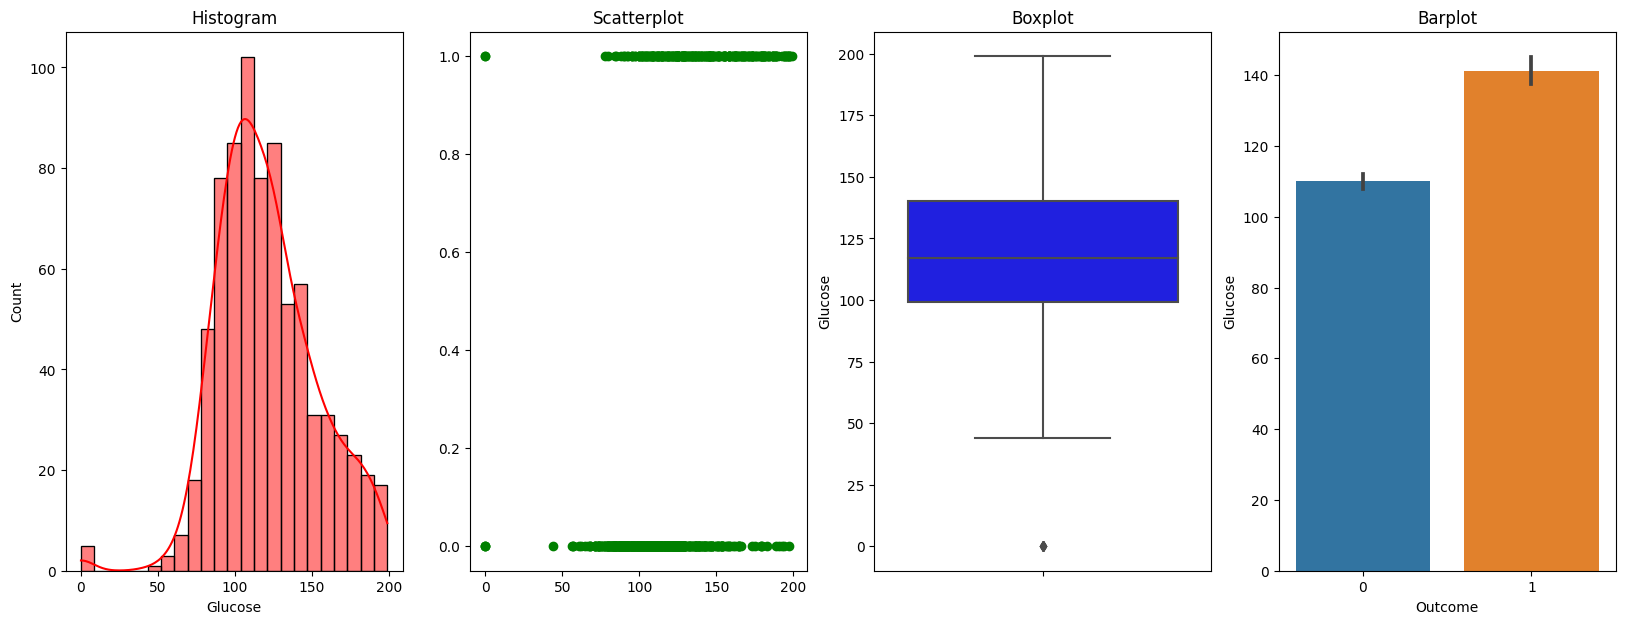

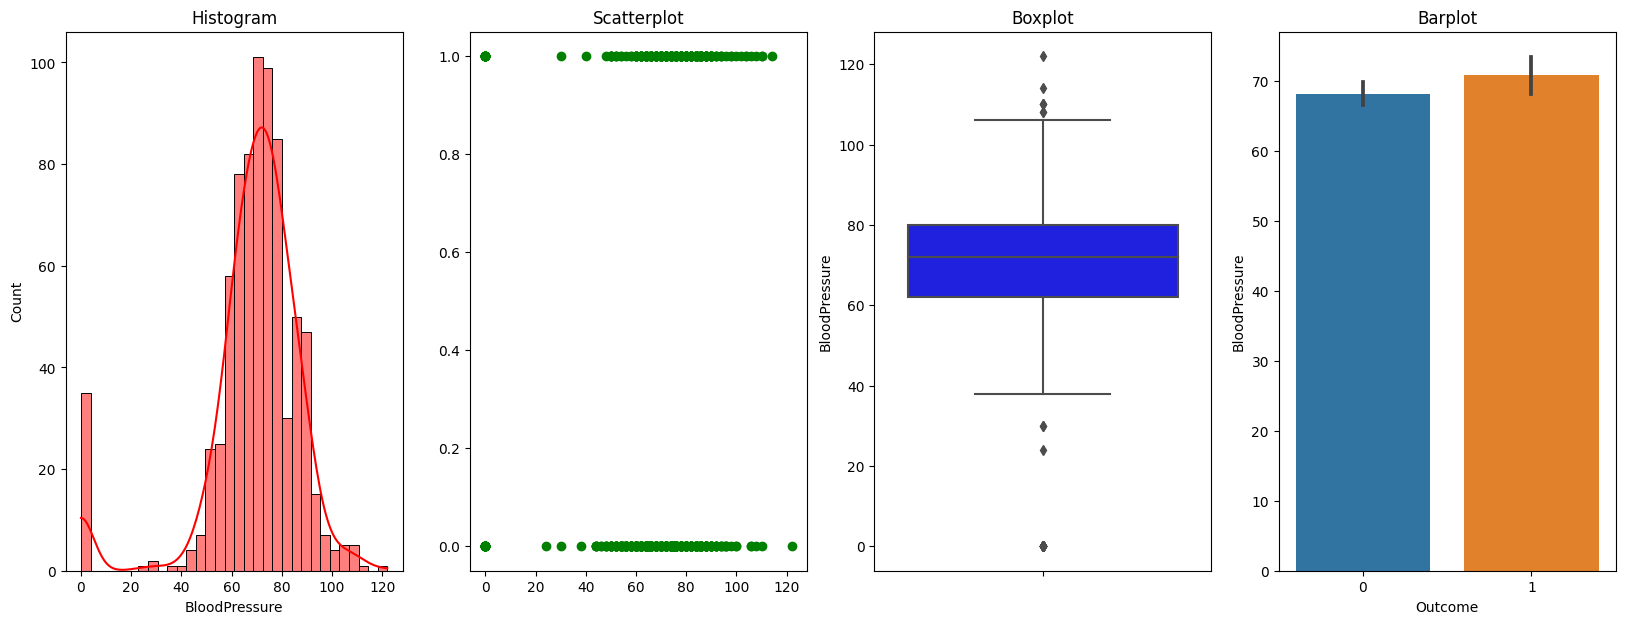

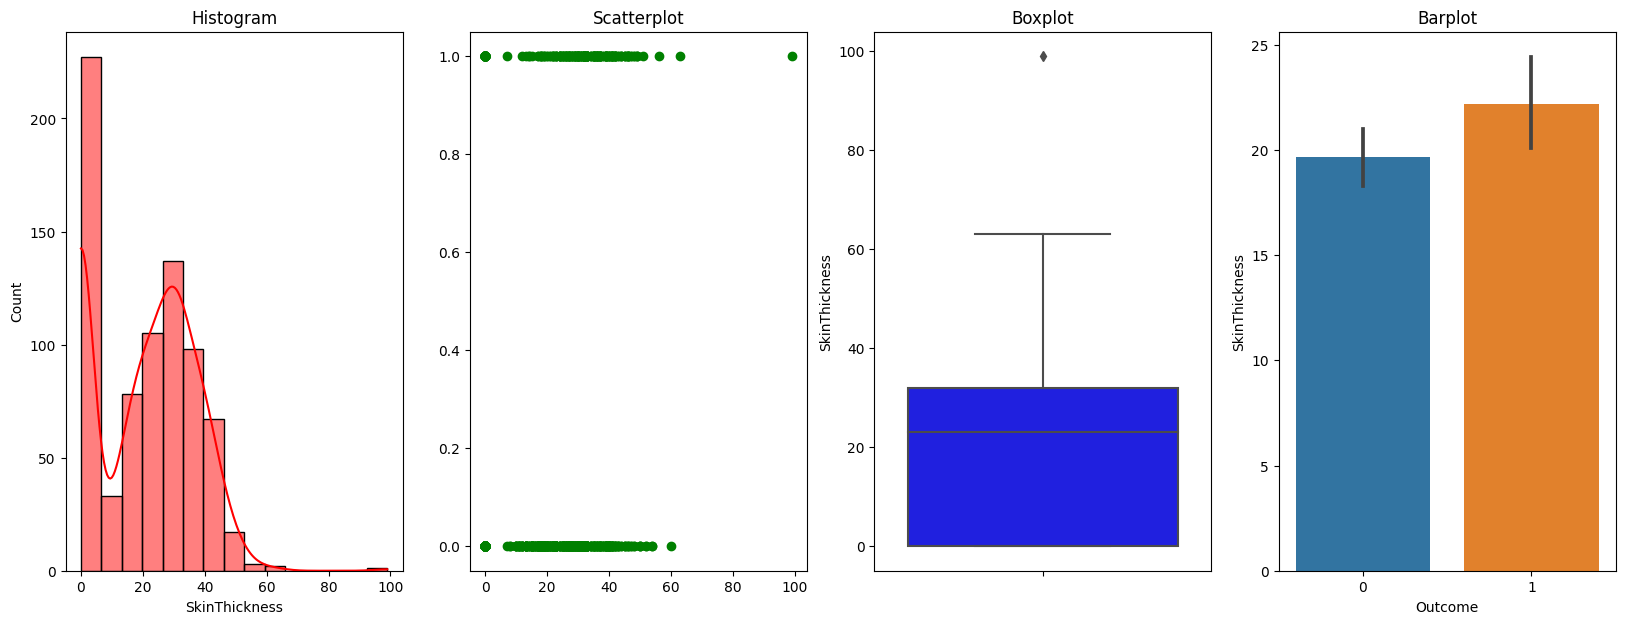

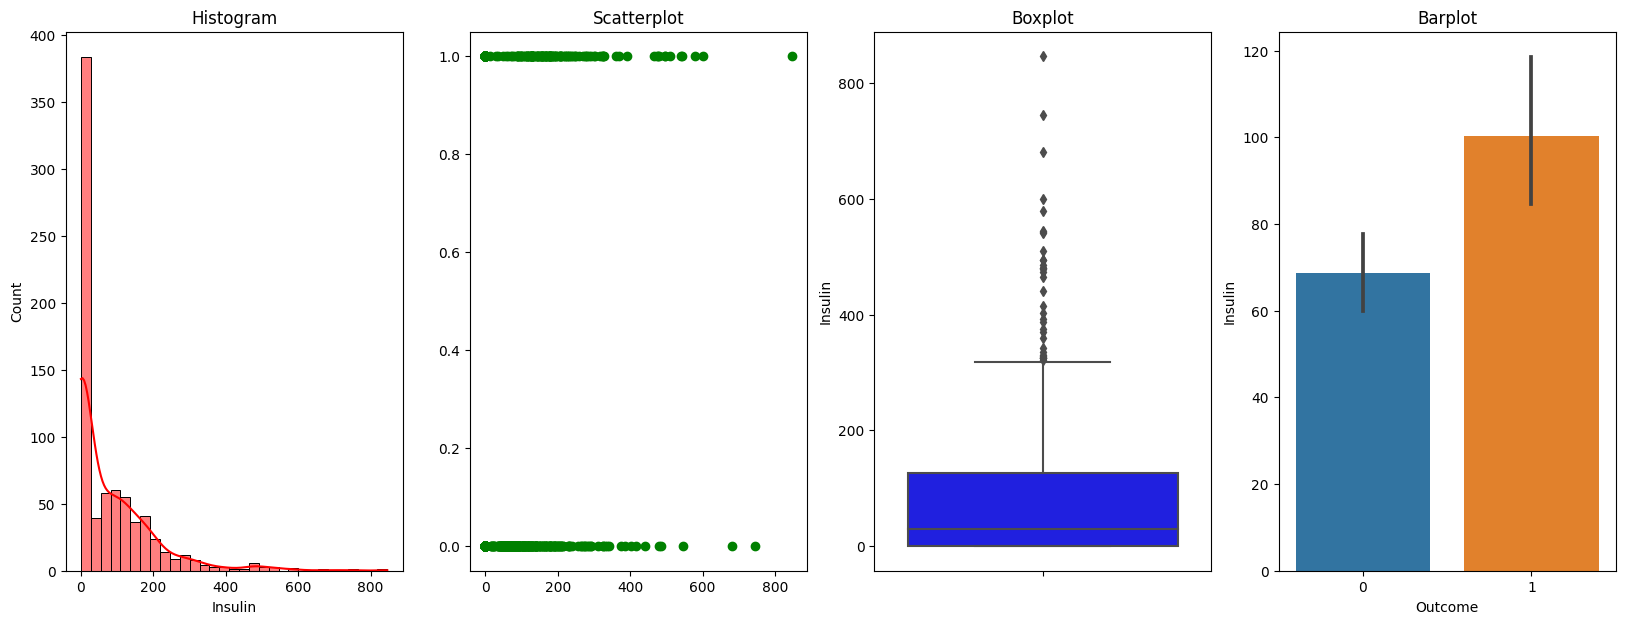

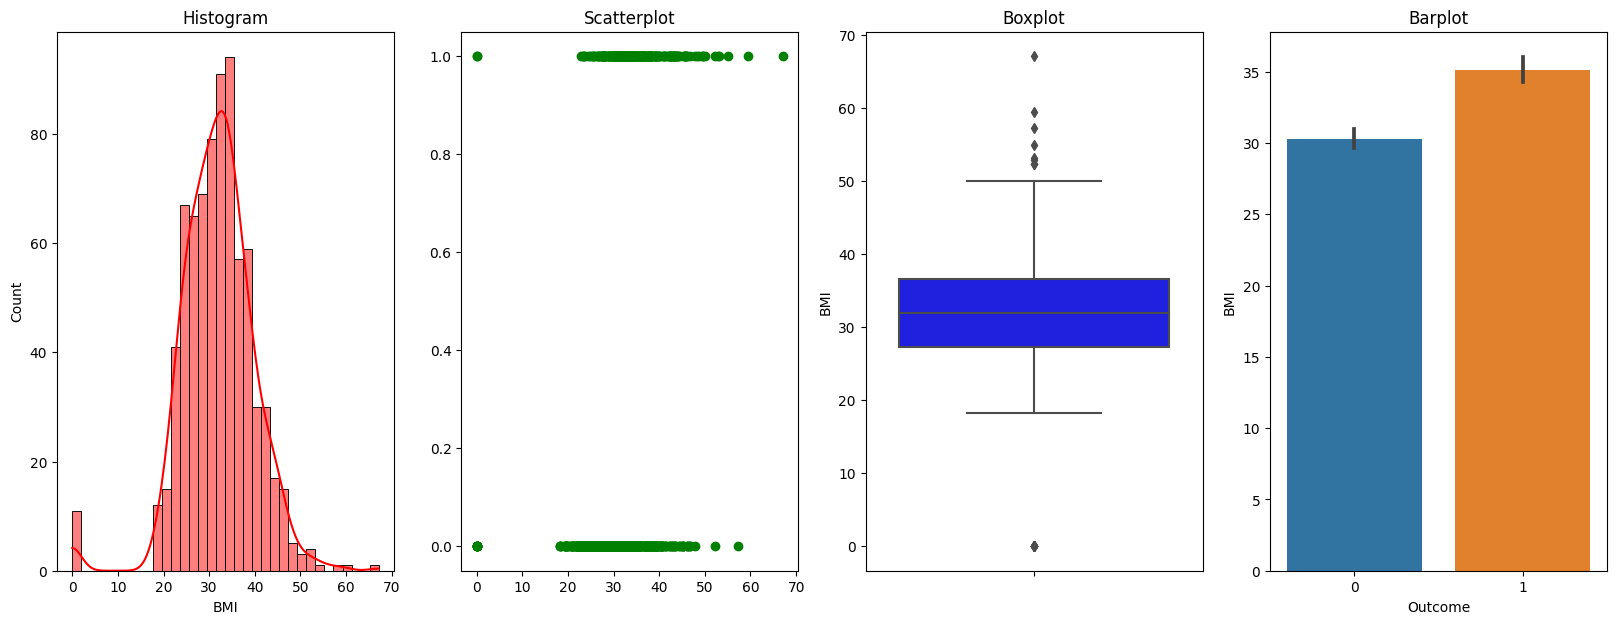

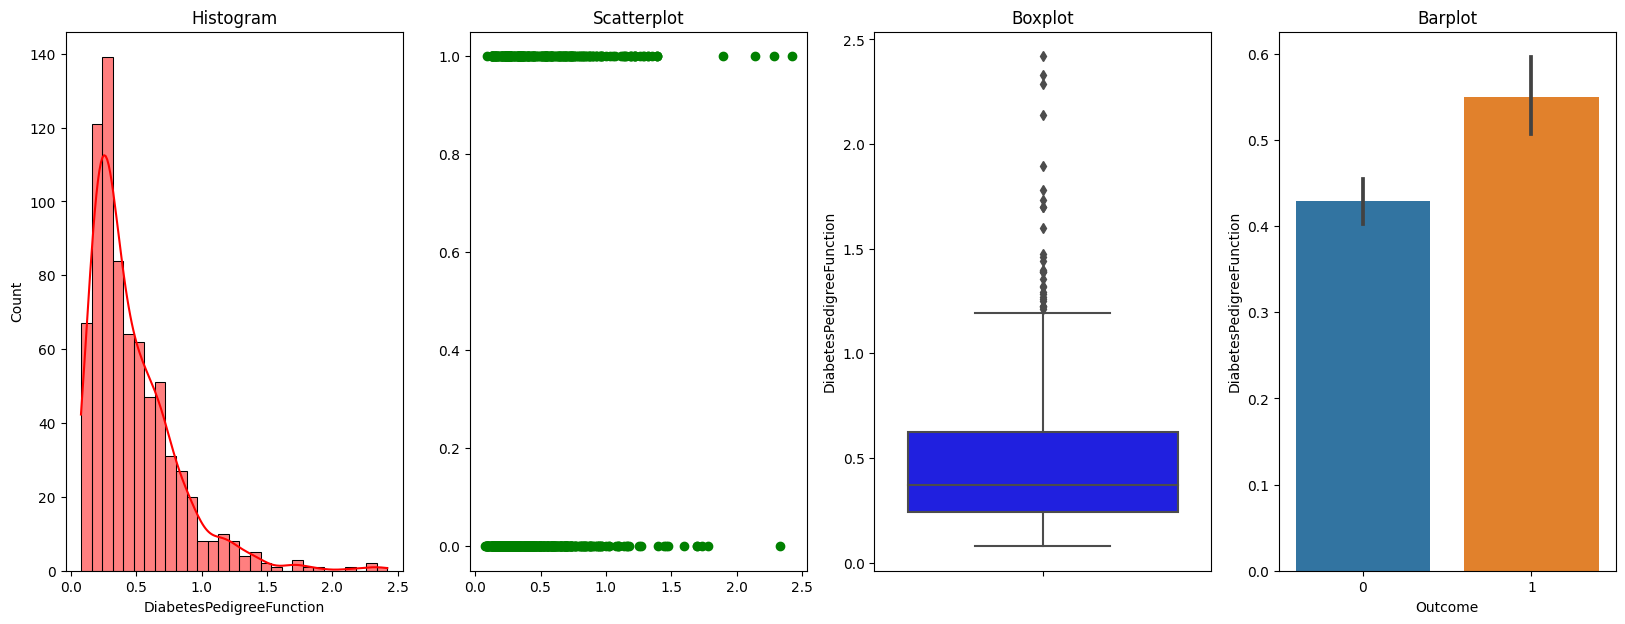

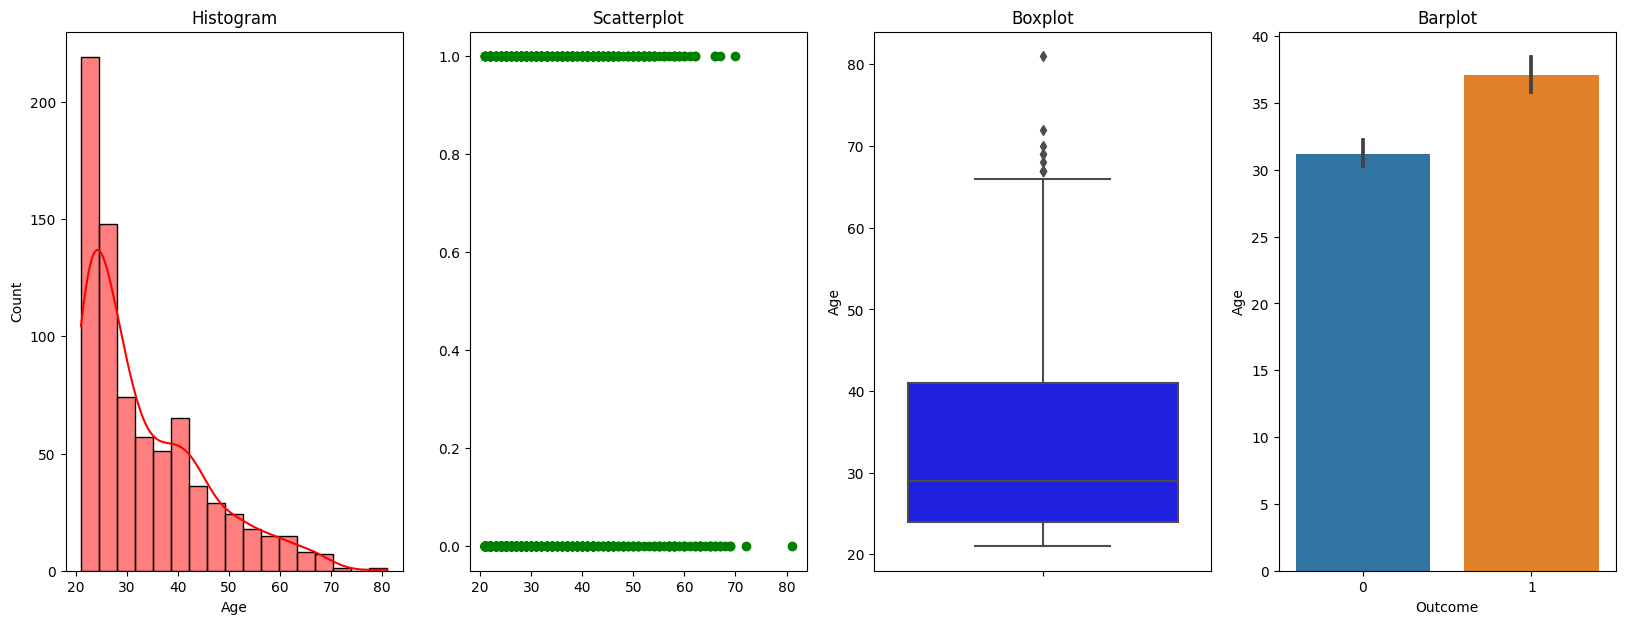

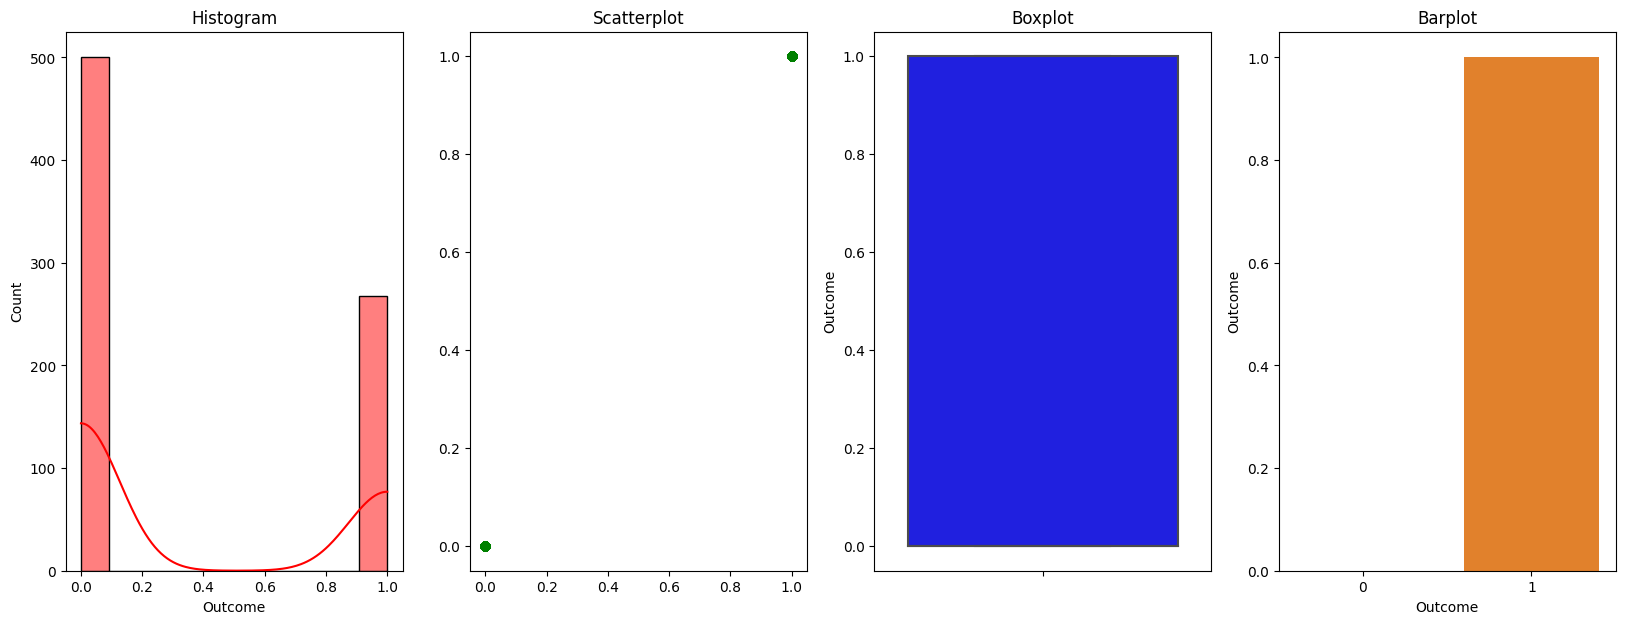

In [20]:
def diagnostic_plots(df, variable,target):

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sbn.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    try:
        plt.subplot(1, 4, 3)
        sbn.boxplot(y=df[variable],color = 'b')
        plt.title('Boxplot')
    except Exception as ex:
        print(ex)
    
    # barplot
    plt.subplot(1, 4, 4)
    sbn.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()
    
for item in dataset:
    diagnostic_plots(dataset,item,'Outcome')

#  Extract the Label and Features

In [21]:
#scalling data 
dataset.head(4)
columns_to_scale = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
scaler = StandardScaler()
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [22]:
#get the output variable and convert that to Int32
label = dataset['Outcome'].astype("int32")

In [23]:
#Drop the OutComes 
# dataset= dataset.drop("OutComes",axis=1)

In [24]:
#Select all colum as features except Outcome in order to predict outcome
features = dataset.drop("Outcome",axis=1)

In [25]:
#top 4 row of features
features.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549


In [26]:
#to 4 row of label
label.head(4)

0    1
1    0
2    1
3    0
Name: Outcome, dtype: int32

In [27]:
len(label)

768

# split the data into training and testing

In [28]:

# the ratio is 80% = trainset   20% = testset
xtrain,xtest,ytrain,ytest = train_test_split(features,label,random_state=2,stratify=label,shuffle=True,test_size=0.2)
print(ytrain.value_counts())
print(ytest.value_counts())

Outcome
0    400
1    214
Name: count, dtype: int64
Outcome
0    100
1     54
Name: count, dtype: int64


In [29]:
xtrain.shape

(614, 8)

# DecisionTreeClassifier

total % of accuracy we got 72.07792207792207 %
the mean of predicted is 0.24025974025974026  and mean of original is 0.35064935064935066
Accuracy: 0.7207792207792207
Precision: 0.6486486486486487
Recall: 0.4444444444444444
F1-score: 0.5274725274725275


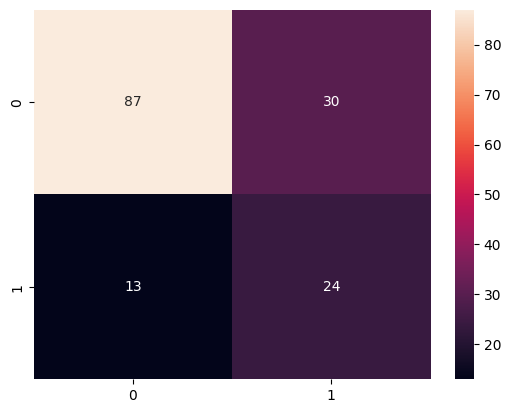

In [30]:
#since it is a classification problem we are using DecesionTreeClassifre Or LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

#fit the data into model 
model.fit(xtrain,ytrain)

#We are getting 64% accuracy in this dataset
model.score(xtest,ytest)

#check the accuracy score 
pred = model.predict(xtest)

print(f"total % of accuracy we got {accuracy_score(ytest,pred)*100} %")

#mean of pred and ytest (  actually mean is not good for this )
print(f"the mean of predicted is {pred.mean()}  and mean of original is {ytest.mean()}")

#confusion_matrix
cm = confusion_matrix(pred,ytest)


accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# display the heatmap of confusion_matrix
sbn.heatmap(cm,annot=True)
plt.show()

# Logistic Regression Model

accuracy we got using LogisticRegression is =  0.7597402597402597%
mean value of predicted 0.2532467532467532 the mean value of test label 0.35064935064935066
Accuracy: 0.7597402597402597
Precision: 0.717948717948718
Recall: 0.5185185185185185
F1-score: 0.6021505376344085


confussion metrix = [[89 26]
 [11 28]]


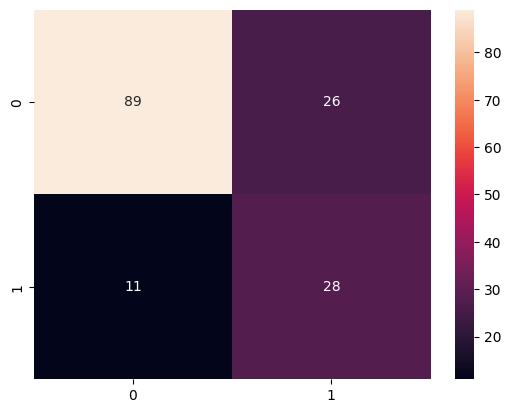

In [31]:
#try with Logistic regression
model = LogisticRegression(max_iter=10000,random_state=2)
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

#predict and display the accuracy_score
pred = model.predict(xtest)
print(f"accuracy we got using LogisticRegression is =  {accuracy_score(ytest,pred)}%")

#mean value of predicted  mean value of actual
print(f"mean value of predicted {pred.mean()} the mean value of test label {ytest.mean()}")

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#confusion_matrix
cm = confusion_matrix(pred,ytest)
print(f"confussion metrix = {cm}")


#plot the confusion_matrix
sbn.heatmap(cm,annot=True)
plt.plot()
plt.show()




## GradientBoostingClassifier

accuracy we got using GradientBoostingClassifier is =  0.7077922077922078%
mean value of predicted 0.2662337662337662 the mean value of test label 0.35064935064935066
Accuracy: 0.7077922077922078
Precision: 0.6097560975609756
Recall: 0.46296296296296297
F1-score: 0.5263157894736843
confussion metrix = [[84 29]
 [16 25]]


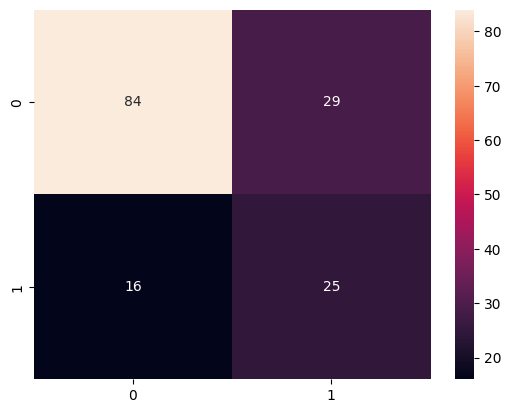

In [32]:
#try with Logistic regression
model = GradientBoostingClassifier(random_state=2)
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

#predict and display the accuracy_score
pred = model.predict(xtest)
print(f"accuracy we got using GradientBoostingClassifier is =  {accuracy_score(ytest,pred)}%")

#mean value of predicted  mean value of actual
print(f"mean value of predicted {pred.mean()} the mean value of test label {ytest.mean()}")

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#confusion_matrix
cm = confusion_matrix(pred,ytest)
print(f"confussion metrix = {cm}")


#plot the confusion_matrix
sbn.heatmap(cm,annot=True)
plt.plot()
plt.show()

## RandomForestClassifier

accuracy we got using RandomForestClassifier is =  0.7272727272727273%
mean value of predicted 0.2597402597402597 the mean value of test label 0.35064935064935066
Accuracy: 0.7272727272727273
Precision: 0.65
Recall: 0.48148148148148145
F1-score: 0.553191489361702
confussion metrix = [[86 28]
 [14 26]]


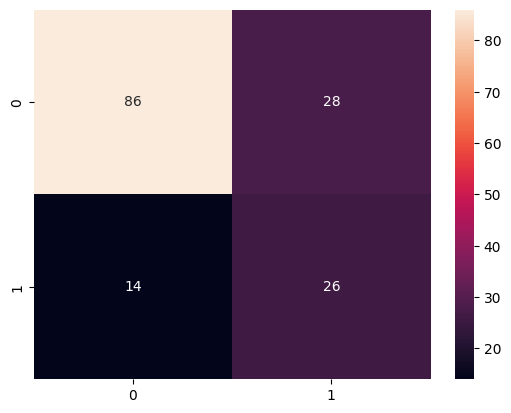

In [33]:
#try with Logistic regression
model = RandomForestClassifier(random_state=2)
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

#predict and display the accuracy_score
pred = model.predict(xtest)
print(f"accuracy we got using RandomForestClassifier is =  {accuracy_score(ytest,pred)}%")

#mean value of predicted  mean value of actual
print(f"mean value of predicted {pred.mean()} the mean value of test label {ytest.mean()}")

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#confusion_matrix
cm = confusion_matrix(pred,ytest)
print(f"confussion metrix = {cm}")


#plot the confusion_matrix
sbn.heatmap(cm,annot=True)
plt.plot()
plt.show()

## KNeighborsClassifier

accuracy we got using KNeighborsClassifier is =  0.7207792207792207%
mean value of predicted 0.24025974025974026 the mean value of test label 0.35064935064935066
Accuracy: 0.7207792207792207
Precision: 0.6486486486486487
Recall: 0.4444444444444444
F1-score: 0.5274725274725275
confussion metrix = [[87 30]
 [13 24]]


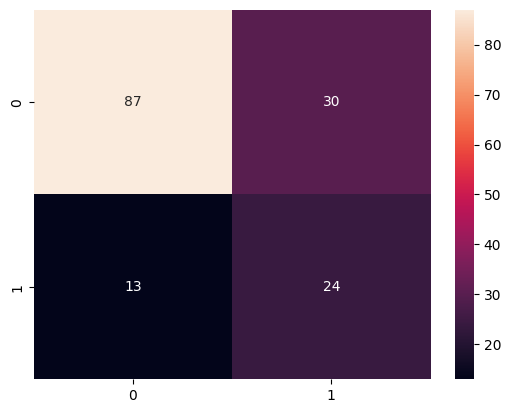

In [34]:
#try with Logistic regression
model = KNeighborsClassifier()
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

#predict and display the accuracy_score
pred = model.predict(xtest)
print(f"accuracy we got using KNeighborsClassifier is =  {accuracy_score(ytest,pred)}%")

#mean value of predicted  mean value of actual
print(f"mean value of predicted {pred.mean()} the mean value of test label {ytest.mean()}")

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#confusion_matrix
cm = confusion_matrix(pred,ytest)
print(f"confussion metrix = {cm}")


#plot the confusion_matrix
sbn.heatmap(cm,annot=True)
plt.plot()
plt.show()

accuracy we got using RandomForestClassifier is =  0.7272727272727273%
mean value of predicted 0.2597402597402597 the mean value of test label 0.35064935064935066
Accuracy: 0.7272727272727273
Precision: 0.65
Recall: 0.48148148148148145
F1-score: 0.553191489361702
confussion metrix = [[86 28]
 [14 26]]


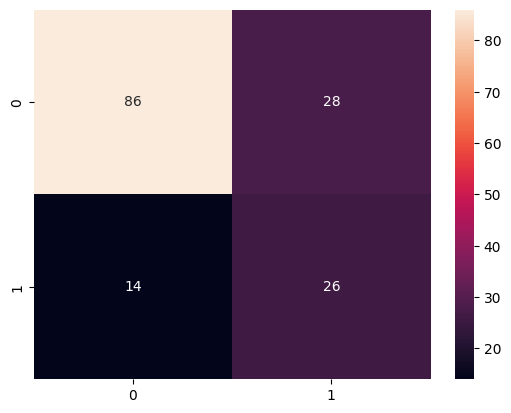

In [35]:
#try with Logistic regression
model = RandomForestClassifier(random_state=2)
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

#predict and display the accuracy_score
pred = model.predict(xtest)
print(f"accuracy we got using RandomForestClassifier is =  {accuracy_score(ytest,pred)}%")

#mean value of predicted  mean value of actual
print(f"mean value of predicted {pred.mean()} the mean value of test label {ytest.mean()}")

accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



#confusion_matrix
cm = confusion_matrix(pred,ytest)
print(f"confussion metrix = {cm}")


#plot the confusion_matrix
sbn.heatmap(cm,annot=True)
plt.plot()
plt.show()

## using SVM 

the score using SVM is 77.27272727272727%
Accuracy: 0.7272727272727273
Precision: 0.65
Recall: 0.48148148148148145
F1-score: 0.553191489361702
[[91  9]
 [26 28]]


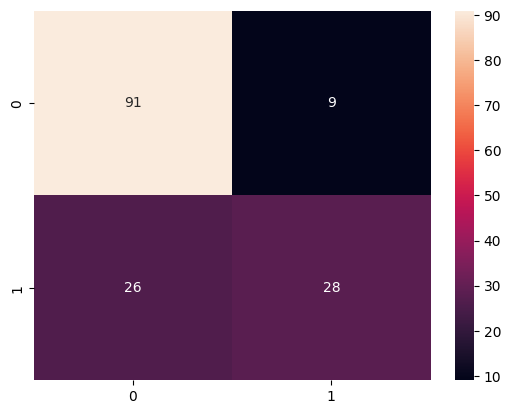

In [36]:
svc = SVC(kernel="linear",random_state=2,probability=True)
svc.fit(xtrain,ytrain)
print(f"the score using SVM is {svc.score(xtest,ytest)*100}%")

pred = model.predict(xtest)


accuracy = accuracy_score(ytest, pred)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1 = f1_score(ytest, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


cm = confusion_matrix(ytest,svc.predict(xtest))
print(cm)
sbn.heatmap(cm,annot=True)
# plt.legend()
plt.show()


## NN model 

In [37]:
import tensorflow as tf

2023-08-27 23:10:08.771035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 23:10:09.518884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [38]:
sc = StandardScaler()
xtrain = sc.fit_transform( np.array(xtrain))
xtest = sc.fit_transform( np.array(xtest))
ytrain = np.array(ytrain)
ytest = np.array(ytest)

In [39]:
xtrain.shape

(614, 8)

In [40]:
ytrain.shape

(614,)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(len(features),activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    # tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    # tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(len(features),activation="relu"),
    tf.keras.layers.Dense(2,activation="sigmoid"),
])
model.compile(loss="sparse_categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

model.fit(xtrain,ytrain,epochs=4,validation_data=(xtest,ytest))


print("\n \n \n \n \n")

loss , acc = model.evaluate(x=xtest,y=ytest)
print(f"the loss is = {loss} and the accuracy is {acc}")

Epoch 1/4


2023-08-27 23:10:11.733308: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-27 23:10:11.757931: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-27 23:10:11.758157: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

20/20 [==============================] - 3s 11ms/step - loss: 0.5432 - accuracy: 0.7150 - val_loss: 0.5603 - val_accuracy: 0.7273
Epoch 2/4
20/20 [==============================] - 0s 4ms/step - loss: 0.4787 - accuracy: 0.7655 - val_loss: 0.5412 - val_accuracy: 0.7208
Epoch 3/4
20/20 [==============================] - 0s 4ms/step - loss: 0.4386 - accuracy: 0.7899 - val_loss: 0.5628 - val_accuracy: 0.7338
Epoch 4/4
20/20 [==============================] - 0s 4ms/step - loss: 0.4342 - accuracy: 0.7883 - val_loss: 0.5753 - val_accuracy: 0.7468

 
 
 
 

5/5 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7468
the loss is = 0.5752878189086914 and the accuracy is 0.7467532753944397


In [42]:
def process(data):
    if data[1] > 0.5:
        return 1
    else:
        return 0
    
pred = model.predict(xtest)
list1 = []
for item in pred:
    list1.append(process(item))


accuracy = accuracy_score(ytest, list1)
precision = precision_score(ytest, list1)
recall = recall_score(ytest, list1)
f1 = f1_score(ytest, list1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


5/5 [==============================] - 0s 1ms/step
Accuracy: 0.7532467532467533
Precision: 0.6538461538461539
Recall: 0.6296296296296297
F1-score: 0.6415094339622641
